In [ ]:
!pip install opencv-python pandas numpy

In [ ]:
import pandas as pd

df = pd.read_csv("/content/colors.csv")
print(df.head())  # Display first few rows to check format


     air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
0   air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
1  air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
2       alabama_crimson        Alabama Crimson  #a32638  163   38   56
3            alice_blue             Alice Blue  #f0f8ff  240  248  255
4      alizarin_crimson       Alizarin Crimson  #e32636  227   38   54


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


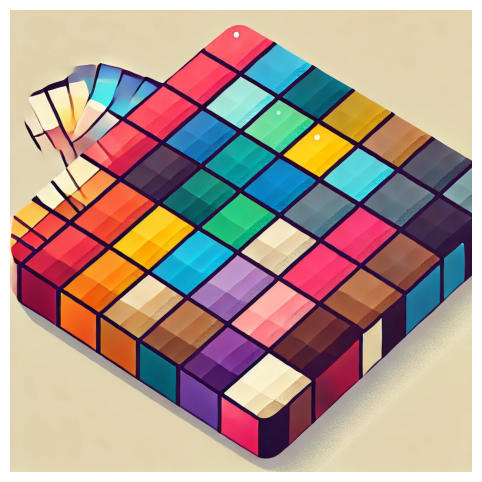

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/image.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

# Display the image in Colab
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


In [ ]:
!pip install numpy pandas opencv-python matplotlib

In [ ]:
!pip install numpy pandas opencv-python matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.9 MB/s eta 0:00:00


In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Load the image
image_path = "/content/image.webp"
csv_path = "/content/colors.csv"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Load color dataset
df = pd.read_csv(csv_path, names=["color", "color_name", "hex", "R", "G", "B"], header=None)

# Function to get the closest color name
def get_color_name(R, G, B):
    min_dist = float("inf")
    color_name = "Unknown"
    for i in range(len(df)):
        d = abs(R - int(df.loc[i, "R"])) + abs(G - int(df.loc[i, "G"])) + abs(B - int(df.loc[i, "B"]))
        if d < min_dist:
            min_dist = d
            color_name = df.loc[i, "color_name"]
    return color_name

# Get image dimensions
rows, cols, _ = img.shape

# Create sliders for selecting coordinates
x_slider = widgets.IntSlider(min=0, max=cols-1, step=1, description="X")
y_slider = widgets.IntSlider(min=0, max=rows-1, step=1, description="Y")

# Function to update the selected color
def update_color(x, y):
    r, g, b = img[y, x]
    color_name = get_color_name(r, g, b)

    # Show selected pixel location
    print(f"Selected Pixel: ({x}, {y})")
    print(f"Color Name: {color_name}")
    print(f"RGB: ({r}, {g}, {b})")

    # Display the selected color
    color_patch = np.zeros((100, 100, 3), dtype=np.uint8)
    color_patch[:, :] = [r, g, b]

    # Plot the image with the selected point
    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.scatter([x], [y], color="white", marker="o", s=50)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(color_patch)
    plt.axis("off")

    plt.show()

# Create an interactive widget
widgets.interactive(update_color, x=x_slider, y=y_slider)


interactive(children=(IntSlider(value=0, description='X', max=1023), IntSlider(value=0, description='Y', max=1…

In [ ]:
!pip install gradio numpy pandas opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import cv2
import pandas as pd
import numpy as np
import gradio as gr

# Load image and color dataset
image_path = "/content/image.webp"
csv_path = "/content/colors.csv"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

df = pd.read_csv(csv_path, names=["color", "color_name", "hex", "R", "G", "B"], header=None)

# Function to get the closest color name
def get_color_name(R, G, B):
    min_dist = float("inf")
    color_name = "Unknown"
    for i in range(len(df)):
        d = abs(R - int(df.loc[i, "R"])) + abs(G - int(df.loc[i, "G"])) + abs(B - int(df.loc[i, "B"]))
        if d < min_dist:
            min_dist = d
            color_name = df.loc[i, "color_name"]
    return color_name

# Function to detect color when clicking on the image
def detect_color(img, x, y):
    if x is None or y is None:
        return "Click on the image to detect color", None

    r, g, b = img[y, x]
    color_name = get_color_name(r, g, b)

    # Create a small color patch
    color_patch = np.zeros((100, 100, 3), dtype=np.uint8)
    color_patch[:, :] = [r, g, b]

    return f"Color: {color_name}\nRGB: ({r}, {g}, {b})", color_patch

# Create a Gradio interface
iface = gr.Interface(
    fn=detect_color,
    inputs=[
        gr.Image(type="numpy", label="Upload or Use the Default Image", value=img),
        gr.Number(label="X Coordinate"),
        gr.Number(label="Y Coordinate"),
    ],
    outputs=[
        gr.Textbox(label="Detected Color Info"),
        gr.Image(label="Color Patch"),
    ],
    title="Interactive Color Detector",
    description="Upload an image or use the default one. Enter X and Y coordinates to detect the color."
)

# Launch the interface in a new tab
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5e74a18fd1d7df4233.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
